## Sorting data

In [1]:
import pandas as pd
import numpy as np
import requests as re
import json
import xml.etree.ElementTree as ET

In [2]:
url = "http://api.worldbank.org/v2/country/de/indicator/NY.GDP.MKTP.CD?format=json"
r = re.get(url)


<AxesSubplot:xlabel='date'>

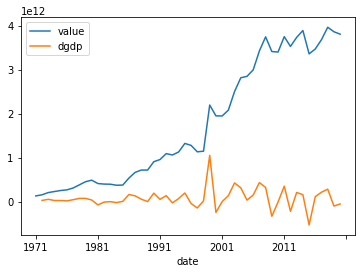

In [3]:
df = pd.DataFrame(r.json()[1])
df["dgdp"] = df["value"] - df["value"].shift(-1)
df[["date", "value", "dgdp"]].sort_values("date").plot(x="date", y=["value", "dgdp"])

In [4]:
coys = ["de", "jp", 'us']

def get_data(c):
    url = "http://api.worldbank.org/v2/country/{}/indicator/NY.GDP.MKTP.CD?format=json".format(c)
    r = re.get(url)
    if r.status_code != 200: return "error bro"
    
    df = pd.DataFrame(r.json()[1])
    df["{}_dg".format(c)] = df["value"] - df["value"].shift(-1)
    df = df[["date", "value", "{}_dg".format(c)]]
    df.sort_values("date").plot(
        x="date", 
        y=["value", "{}_dg".format(c)]
    )
    df.rename(columns={"value" : "{}_g".format(c)}, inplace=True)
    return df

,date,de_g,de_dg
0,2020,3.806060e+12,-5.506342e+10
1,2019,3.861124e+12,-1.026440e+11
2,2018,3.963768e+12,2.811650e+11
3,2017,3.682602e+12,2.127490e+11
4,2016,3.469853e+12,1.122677e+11


,date,jp_g,jp_dg
0,2020,NaN,NaN
1,2019,5.064873e+12,1.100663e+11
2,2018,4.954807e+12,8.794221e+10
3,2017,4.866864e+12,-5.567373e+10
4,2016,4.922538e+12,5.330625e+11


,date,us_g,us_dg
0,2020,20936600000000,-4.966247e+11
1,2019,21433224697000,8.213638e+11
2,2018,20611860934000,1.068882e+12
3,2017,19542979183000,7.979035e+11
4,2016,18745075687000,5.067751e+11


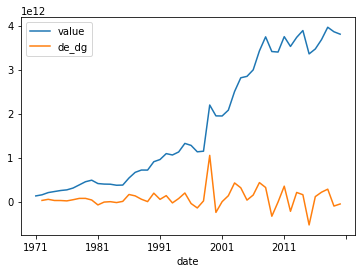

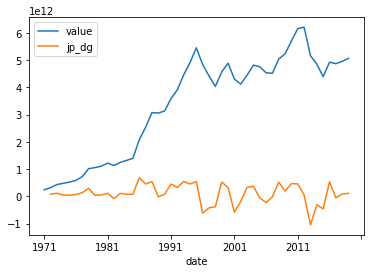

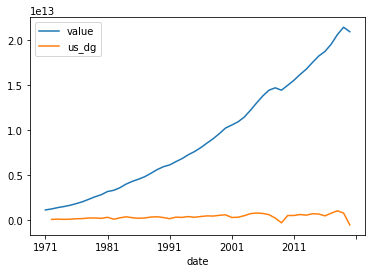

In [5]:
data = pd.DataFrame()

for c in coys:
    cdf = get_data(c)
    display(cdf.head())

In [8]:
fred = "https://api.stlouisfed.org/fred/series/observations"
# realtime = "&realtime_start= & realtime_end="
key = "&api_key=c3f1de3753584f21090de8585c7a90bc"
filetype = "&file_type=json"

series_id = "?series_id=MKTGDPJPA646NWDB"
frequency = "&frequency=a"

check = fred+series_id+frequency+key+filetype
# c = re.get(check)
print(check)

https://api.stlouisfed.org/fred/series/observations?series_id=MKTGDPJPA646NWDB&frequency=a&api_key=c3f1de3753584f21090de8585c7a90bc&file_type=json


In [7]:
c.json()

{'realtime_start': '2021-07-19',
 'realtime_end': '2021-07-19',
 'observation_start': '1600-01-01',
 'observation_end': '9999-12-31',
 'units': 'lin',
 'output_type': 1,
 'file_type': 'json',
 'order_by': 'observation_date',
 'sort_order': 'asc',
 'count': 60,
 'offset': 0,
 'limit': 100000,
 'observations': [{'realtime_start': '2021-07-19',
   'realtime_end': '2021-07-19',
   'date': '1960-01-01',
   'value': '44307342950.4'},
  {'realtime_start': '2021-07-19',
   'realtime_end': '2021-07-19',
   'date': '1961-01-01',
   'value': '53508617739.3778'},
  {'realtime_start': '2021-07-19',
   'realtime_end': '2021-07-19',
   'date': '1962-01-01',
   'value': '60723018683.7333'},
  {'realtime_start': '2021-07-19',
   'realtime_end': '2021-07-19',
   'date': '1963-01-01',
   'value': '69498131797.3333'},
  {'realtime_start': '2021-07-19',
   'realtime_end': '2021-07-19',
   'date': '1964-01-01',
   'value': '81749006381.5111'},
  {'realtime_start': '2021-07-19',
   'realtime_end': '2021-07-1